# Anisha Dhadge

# Task 6: Prediction using Decision Tree Algorithm

# Create the Decision Tree classifier and visualize it graphically.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Loading data

In [2]:
df=pd.read_csv("C:\\Users\\dhadg\\Downloads\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.drop(['Id'],axis=1,inplace=True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
class_name=df['Species'].value_counts()
print(class_name)

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


# Data Visualization

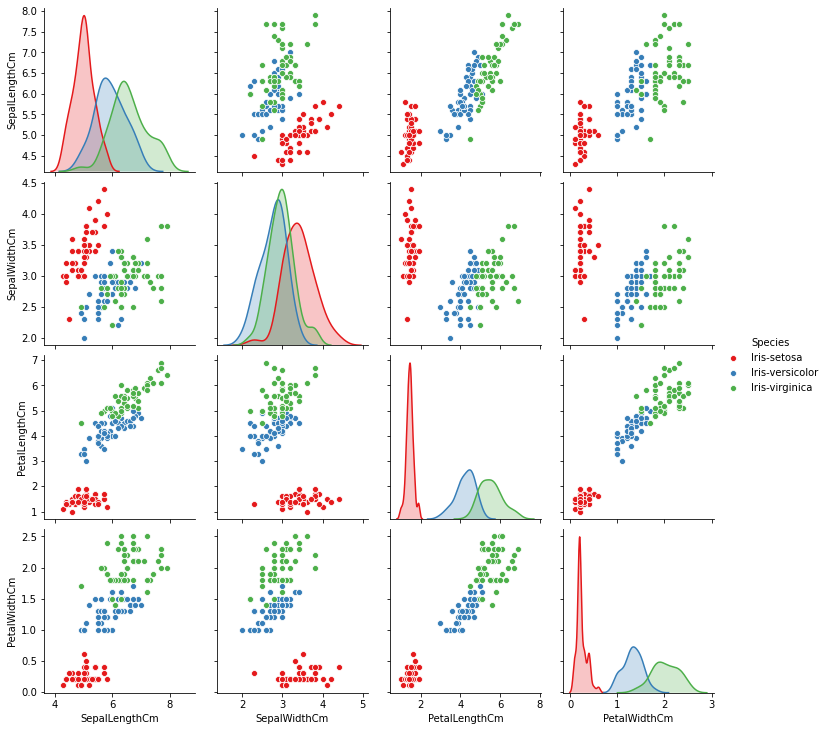

In [11]:
sns.pairplot(df,hue='Species',palette='Set1')

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

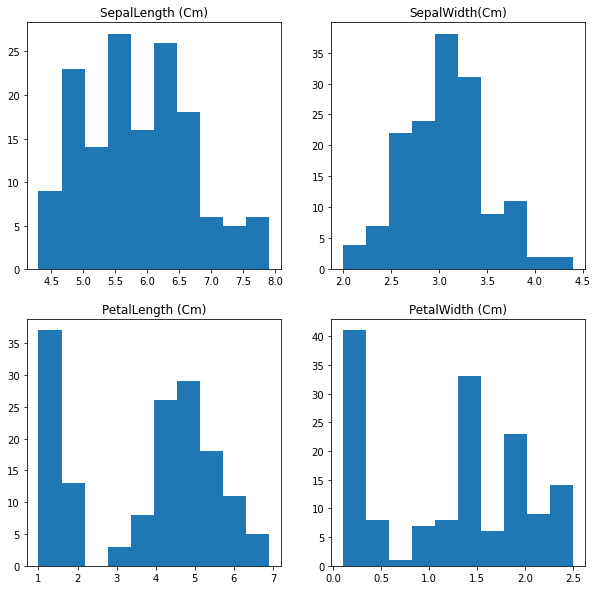

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("SepalLength (Cm)")
plt.hist(df["SepalLengthCm"])
plt.subplot(2,2,2)
plt.title("SepalWidth(Cm)")
plt.hist(df["SepalWidthCm"])
plt.subplot(2,2,3)
plt.title("PetalLength (Cm)")
plt.hist(df["PetalLengthCm"])
plt.subplot(2,2,4)
plt.title("PetalWidth (Cm)")
plt.hist(df["PetalWidthCm"])

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


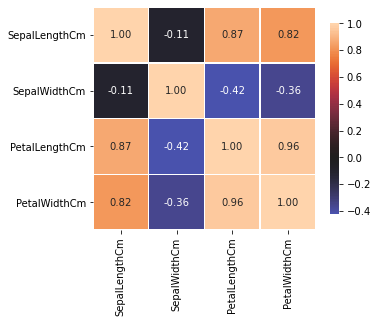

In [14]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

# Preparing the data

In [15]:
x=df.drop(['Species'],axis=1)
y=df['Species']

# Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
pred=dt.predict(x_test)
print(pred)

['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


# Checking Accuracy 

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print("Classification report:")
print(classification_report(y_test,pred))

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [22]:
print("Confusion matrix:")
print(confusion_matrix(y_test,pred))

Confusion matrix:
[[10  0  0]
 [ 0  7  1]
 [ 0  0 12]]


In [23]:
print("Accuracy Score: ",accuracy_score(y_test,pred))

Accuracy Score:  0.9666666666666667


In [24]:
text_representation=tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



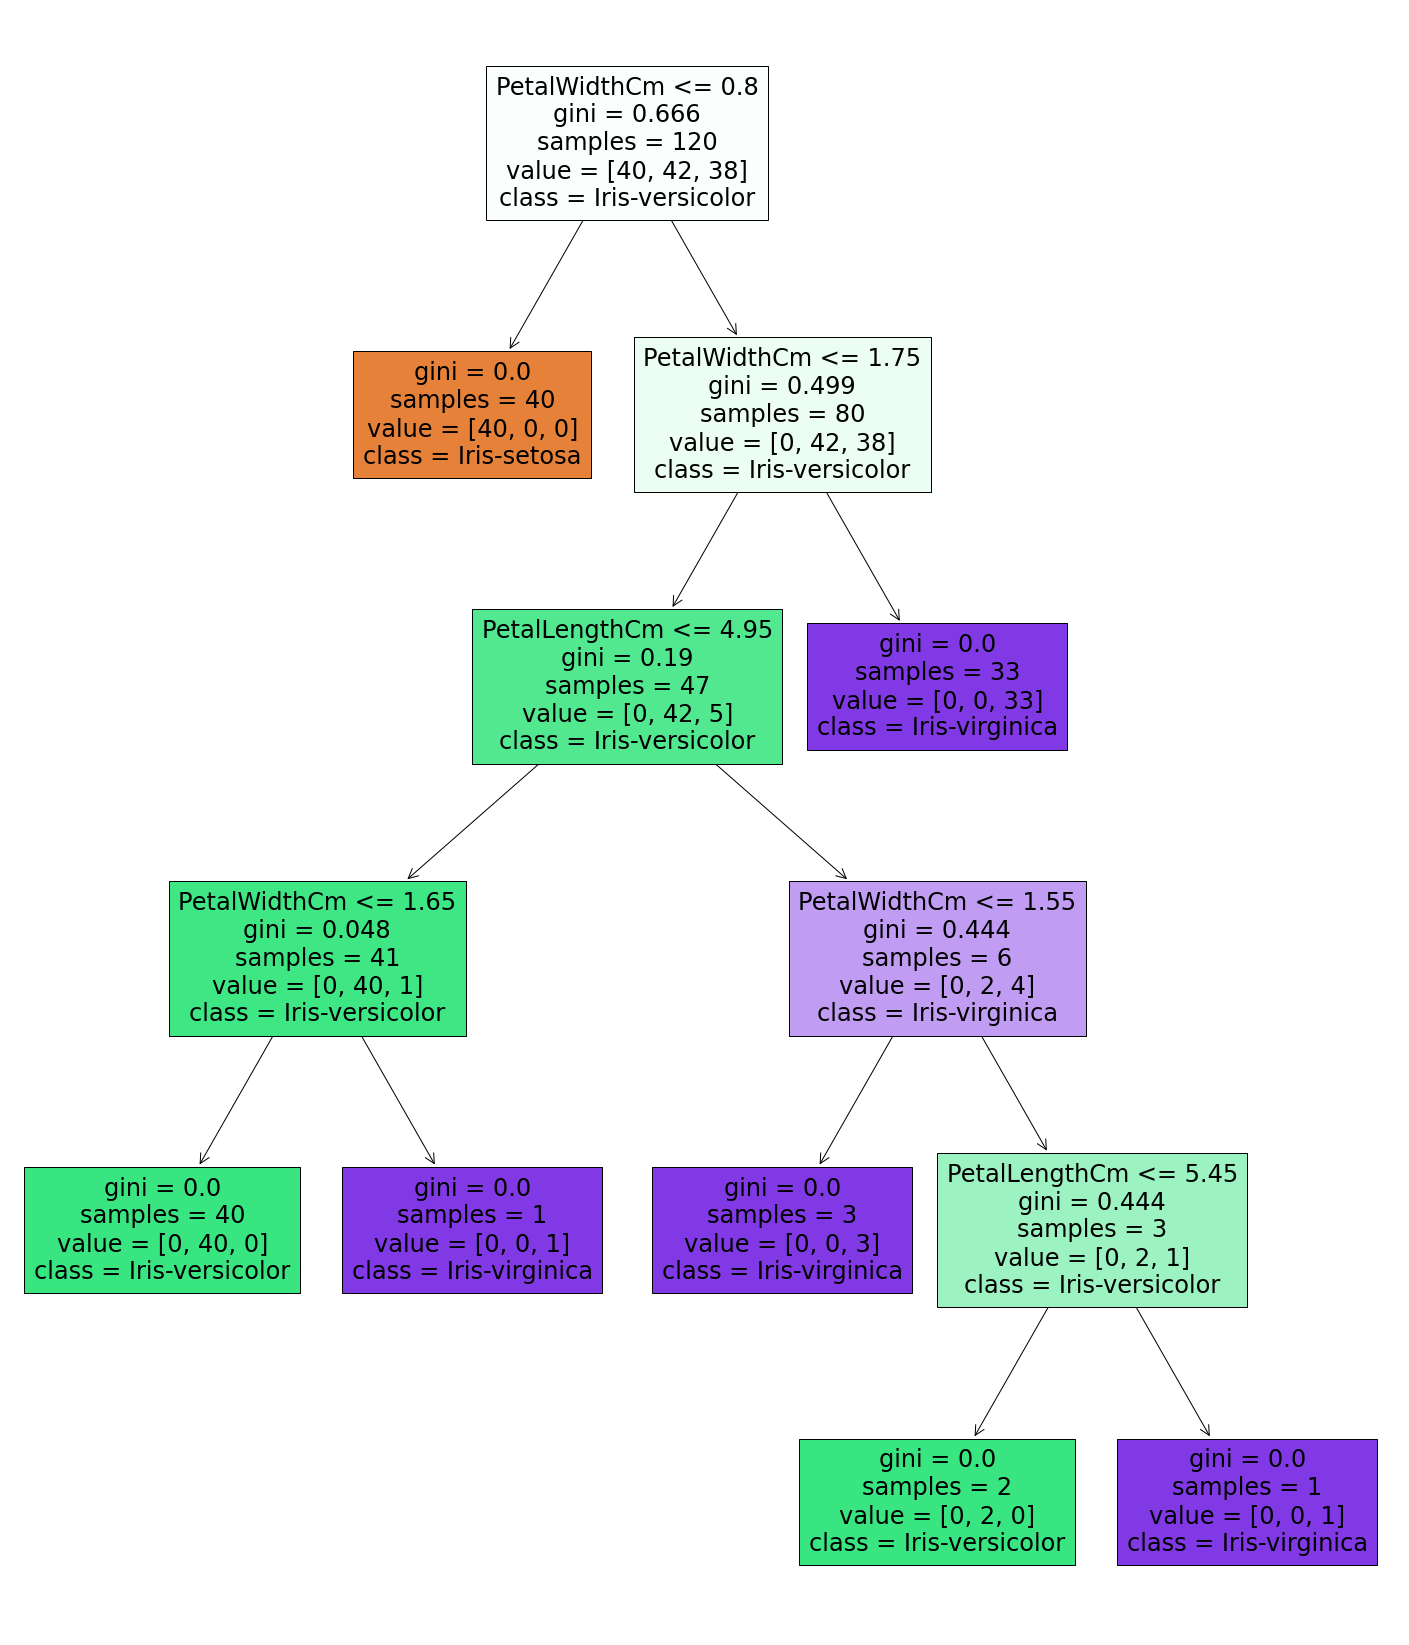

In [25]:
fig=plt.figure(figsize=(25,30))
feature_name=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_name=['Iris-setosa','Iris-versicolor','Iris-virginica']
tree_representation=tree.plot_tree(dt,feature_names=feature_name,class_names=class_name,filled=True)

# Thank you